In [1]:
import pandas as %pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE


import random as rnd
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import GradientBoostingRegressor

In [2]:

# БЕЗ ВКЛЮЧЕННЫХ МАРКЕРОВ

In [261]:
tab1 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo2chains.csv")
tab2 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo3chains.csv")
tab3 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo4chains.csv")
tab4 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo5chains.csv")

tab1.shape, tab2.shape, tab3.shape, tab4.shape

((467, 11), (467, 29), (467, 53), (467, 89))

In [26]:
tab1["key"] = [i for i in range(tab1.shape[0])]
tab2["key"] = [i for i in range(tab2.shape[0])]
tab3["key"] = [i for i in range(tab3.shape[0])]
tab4["key"] = [i for i in range(tab4.shape[0])]

In [254]:
tab = pd.merge(tab1, tab2, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab3, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab4, left_on="key", right_on="key", how="inner")

In [28]:
for i in tab.keys():
    print(i+"; ",end="")

Br***C***; C***C***; C***Cl***; C***F***; C***N***; C***O***; C***S***; N***N***; N***O***; N***S***; O***S***; key; Br***C***C***; Br***C***S***; C***C***C***; C***C***Cl***; C***C***F***; C***C***N***; C***C***O***; C***C***S***; C***N***C***; C***N***N***; C***N***O***; C***N***S***; C***O***C***; C***O***N***; C***S***C***; C***S***N***; C***S***O***; Cl***C***S***; F***C***F***; F***C***O***; F***C***S***; N***C***N***; N***C***O***; N***C***S***; N***S***O***; O***C***O***; O***C***S***; O***N***O***; O***S***O***; Br***C***C***C***; Br***C***C***N***; Br***C***C***O***; Br***C***C***S***; Br***C***S***C***; C***C***C***C***; C***C***C***Cl***; C***C***C***F***; C***C***C***N***; C***C***C***O***; C***C***C***S***; C***C***N***C***; C***C***N***N***; C***C***N***O***; C***C***N***S***; C***C***O***C***; C***C***O***N***; C***C***S***C***; C***C***S***N***; C***C***S***O***; C***N***C***N***; C***N***C***O***; C***N***C***S***; C***N***N***C***; C***N***O***C***; C***N***S***C***;

In [29]:
tab = tab.drop("key",axis=1)
tab.shape

(467, 182)

In [30]:
tab.head()

,Br***C***,C***C***,C***Cl***,C***F***,C***N***,C***O***,C***S***,N***N***,N***O***,N***S***,...,N***C***C***C***O***,N***C***C***C***S***,N***C***C***N***N***,N***C***C***N***O***,N***C***C***O***N***,N***C***C***S***O***,N***N***C***C***O***,N***N***C***C***S***,N***O***C***C***O***,S***C***C***C***S***
0,0.0,17.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,16.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,17.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,18.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [32]:
y = np.array(y)

In [33]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))

In [34]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf

In [35]:
X = np.array(tab)

In [36]:
my_pca = PCA(5)

In [37]:
X_pca = my_pca.fit_transform(X)

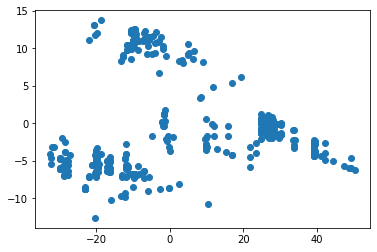

In [38]:
plt.scatter(X_pca[:,0], X_pca[:,1])


In [39]:
my_tsne = TSNE()
X_tsne = my_tsne.fit_transform(X)

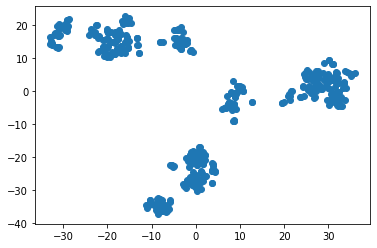

In [40]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [245]:
aggl = AgglomerativeClustering(n_clusters=5, linkage="complete", affinity="manhattan")
aggl = DBSCAN(eps=12, min_samples=10)

In [246]:
res = aggl.fit_predict(X)

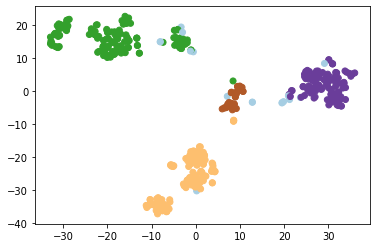

In [255]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

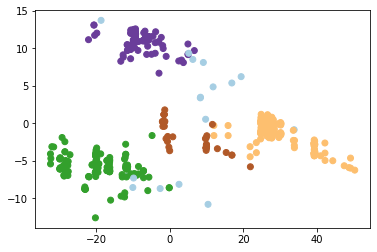

In [248]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [262]:
silhouette_score(X,res)

0.4203236633111643

In [263]:
cluster_structure = res

In [264]:
mdl = RandomForestRegressor(n_jobs=-1, max_depth=20, min_samples_leaf=2, criterion="mse", max_features="log2")
# mdl = GradientBoostingRegressor(n_estimators=30, loss='ls', max_depth=10, min_samples_leaf=4)
# mdl = Ridge(2)

In [265]:
y_new = []
ans_all = []
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    print(X_in_clust.shape)
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]

        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print(MSE(ans,y_in_clust[:]), MAE(ans,y_in_clust[:]))
    print()

(169, 182)
1127.2378710946655 23.624835478643327

(130, 182)
545.3723284834668 12.126824965183

(113, 182)
1479.54066739156 30.154639314168666

(38, 182)
531.8655633668552 10.895502186124837



In [243]:
print(MSE(ans_all,y_new[:]), MAE(ans_all,y_new[:]),y_in_clust.shape)

911.807936229661 18.5448852778326 (15,)


In [266]:
def plot_answer(ans, true):
    
    x = [i for i in range(len(ans))]
    
    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.legend()
    
    ax.scatter(x, ans, alpha=0.8, c="blue", label="Answer")
    ax.scatter(x, true, alpha=0.8, c="red", label="True")
    ax.legend(loc='upper left', fontsize=20)
    
    
    plt.show()

No handles with labels found to put in legend.


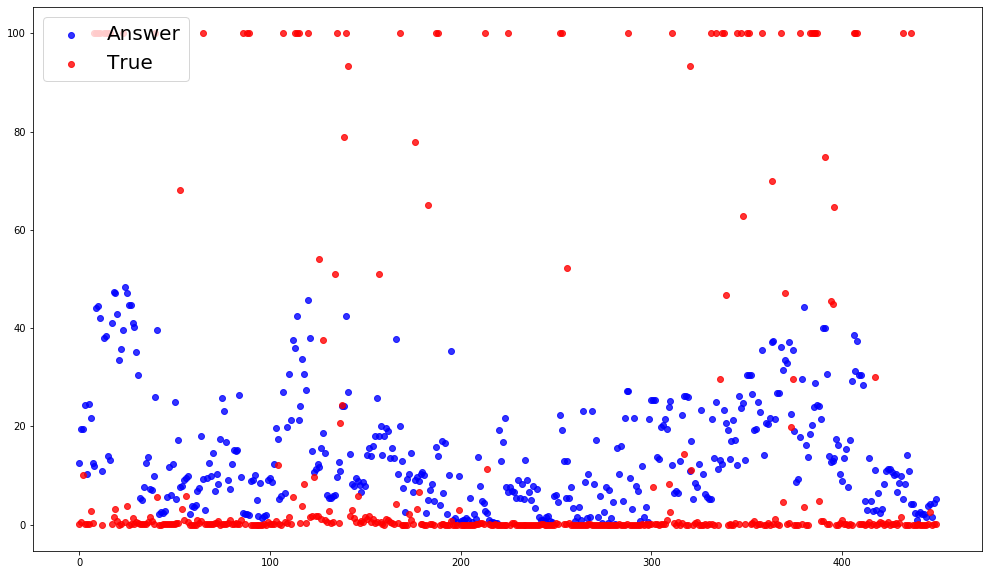

In [267]:
plot_answer(ans_all, y_new)

In [419]:
y

array([[6.00e-02, 6.00e-02],
       [5.10e-01, 5.10e-01],
       [1.02e+01, 1.02e+01],
       [6.00e-02, 6.00e-02],
       [8.00e-02, 8.00e-02],
       [4.00e-02, 4.00e-02],
       [2.87e+00, 2.87e+00],
       [2.50e-01, 2.50e-01],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.40e-02, 1.40e-02],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.00e+02,      inf],
       [1.20e-01, 1.20e-01],
       [1.61e+00, 1.61e+00],
       [1.02e+00, 1.02e+00],
       [6.00e-02, 6.00e-02],
       [3.23e+00, 3.23e+00],
       [7.50e-01, 7.50e-01],
       [2.00e-02, 2.00e-02],
       [5.00e-02, 5.00e-02],
       [1.00e+02,      inf],
       [4.70e-01, 4.70e-01],
       [3.88e+00, 3.88e+00],
       [3.00e-02, 3.00e-02],
       [8.00e-02, 8.00e-02],
       [1.44e+00, 1.44e+00],
       [1.40e-01, 1.40e-01],
       [1.00e+02,      inf],
       [5.20e-

$a * u^{n+1}_{m-1} + b * u^{n+1}_{m} + c * u^{n+1}_{m+1} = d$

$u^1_m = f(\tau*0,h*1)$, где h - длина шага сетки по X, \tau длина шага по T
